Data found at https://www.kaggle.com/kemical/kickstarter-projects

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('ks-projects-201801.csv')

In [3]:
# Drop all null values
df = df.dropna()

# Convert data columns to DateTime
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])  

# One-Hot encoding of categorical variables
features = pd.get_dummies(df, columns=['main_category', 'currency', 'state', 'country'])

# Drop Name and Category variable
features = features.drop(['category', 'name', 'deadline', 'launched'], 1)

# Remove Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
features = features[~((features < (Q1 - 1.5 * IQR)) |(features > (Q3 + 1.5 * IQR))).any(axis=1)]

In [4]:
features.head()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,main_category_Art,main_category_Comics,main_category_Crafts,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000002330,1000.0,0.0,0,0.0,0.0,1533.95,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000003930,30000.0,2421.0,15,100.0,2421.0,30000.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1000007540,5000.0,1.0,1,1.0,1.0,5000.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1000011046,19500.0,1283.0,14,1283.0,1283.0,19500.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1000023410,1000.0,1205.0,16,1205.0,1205.0,1000.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273017 entries, 0 to 378660
Data columns (total 63 columns):
ID                            273017 non-null int64
goal                          273017 non-null float64
pledged                       273017 non-null float64
backers                       273017 non-null int64
usd pledged                   273017 non-null float64
usd_pledged_real              273017 non-null float64
usd_goal_real                 273017 non-null float64
main_category_Art             273017 non-null uint8
main_category_Comics          273017 non-null uint8
main_category_Crafts          273017 non-null uint8
main_category_Dance           273017 non-null uint8
main_category_Design          273017 non-null uint8
main_category_Fashion         273017 non-null uint8
main_category_Film & Video    273017 non-null uint8
main_category_Food            273017 non-null uint8
main_category_Games           273017 non-null uint8
main_category_Journalism      273017 non-null u

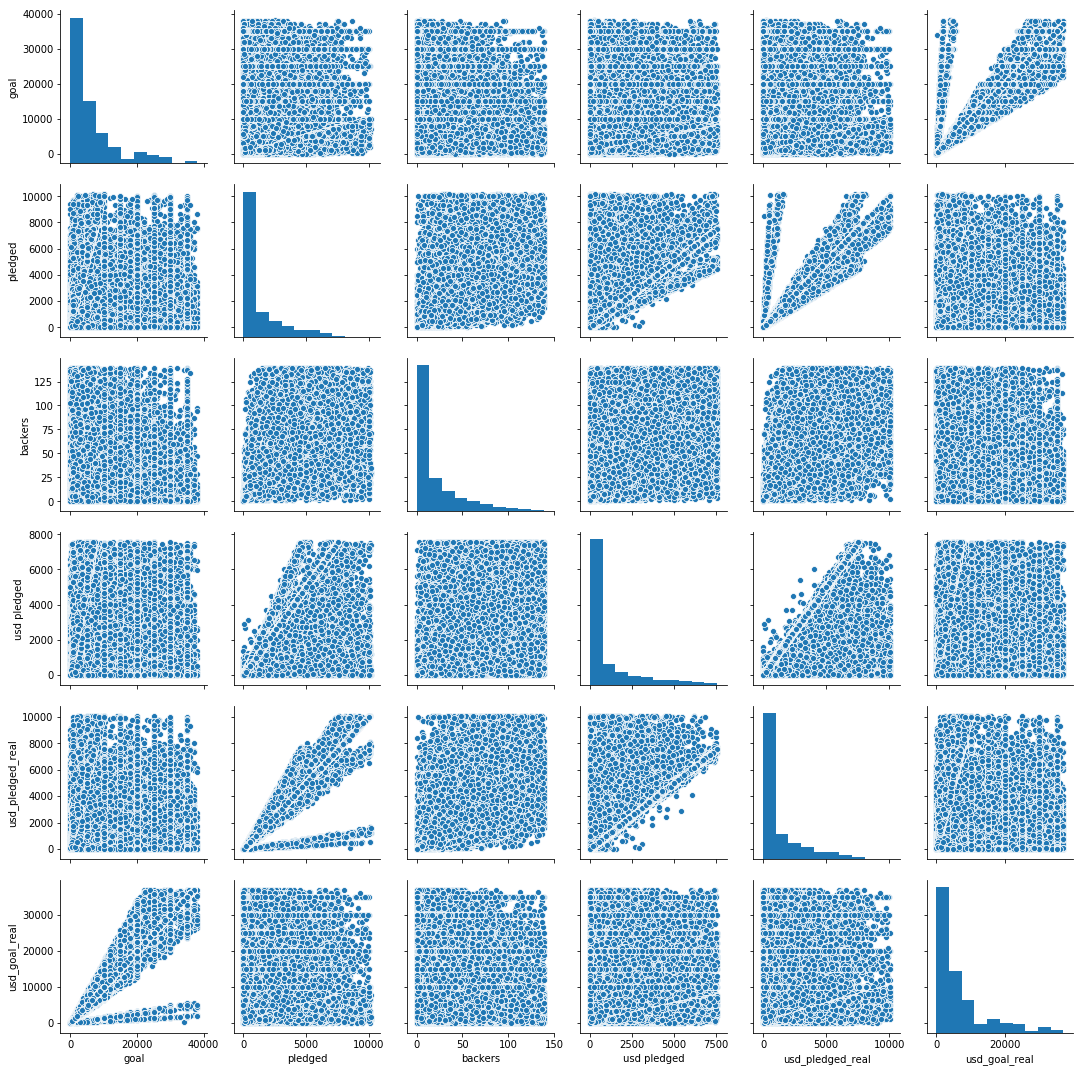

In [6]:
sns.pairplot(features[['goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']])

In [7]:
# Baseline Neural Net Prediction Model

X = features.drop(columns='state_successful')
Y = features.state_successful

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.9, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(100,))

mlp.fit(x_train, y_train)

print(mlp.score(x_test, y_test))

0.5765436520210324


In [ ]:
# Weak Learners Model

In [ ]:
# Random Forest Model